### csv에서 가져오기

In [1]:
# 이미지 링크 파일 가져오기
imgs = pd.read_csv("../csv/food_final.csv", encoding ='euc-kr')

감


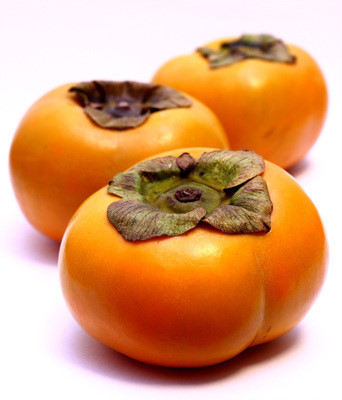

In [9]:
from PIL import Image as pil
import requests
from io import BytesIO
import numpy
img = imgs.iloc[0]
name = img['foodName']
url1 = requests.get(img['foodImg'])
img1 = Image.open(BytesIO(url1.content))
print(name)
display(img1)

### DB에서 가져오기

In [112]:
import pymysql

conn = pymysql.connect(
    host='localhost', user='root', password='dss',
    db='let_it_zoom', charset='utf8')

import random

len_foodlist = 283
picked_food = random.randint(1, len_foodlist)

with conn.cursor() as cursor:
    
    sql = '''SELECT foodImg
         FROM food_list
         WHERE foodId = %s'''
    cursor.execute(sql,(picked_food))
    url1 = cursor.fetchone()[0]
print(url1)

conn.close()

https://i.ytimg.com/vi/idulQZmYT-c/maxresdefault.jpg


In [113]:
import requests
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

In [114]:

url1 = requests.get(url1)
img1 = Image.open(BytesIO(url1.content))

size = img1.size  #width, height
size


(1280, 720)

In [115]:
# 센터 찾기
center = (size[0]/2, size[1]/2)
center

(640.0, 360.0)

In [116]:
# 중심점에서 특정 거리 떨어져있는 거리 찾기
i= 0.3

left = center[0] - size[0] * i
top = center[1] - size[1] * i
right = center[0] + size[0] * i
bottom = center[1] + size[1] * i
area = (left, top, right, bottom)
area

(256.0, 144.0, 1024.0, 576.0)

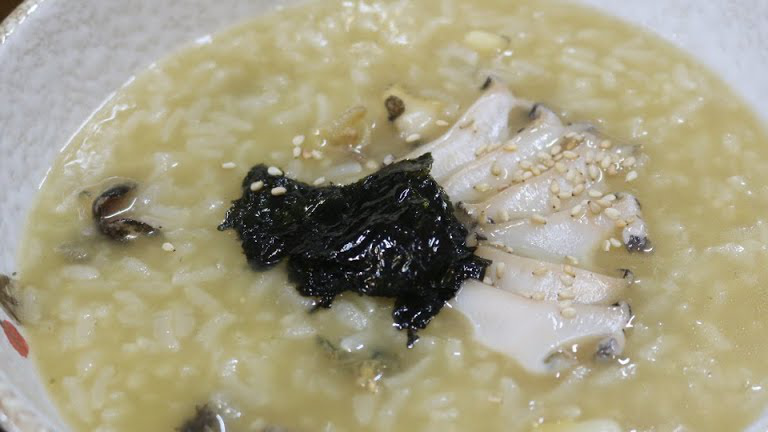

In [117]:
# 이미지를 pillow로 crop
pil_element_img = img1.crop(area)
pil_element_img

0.05


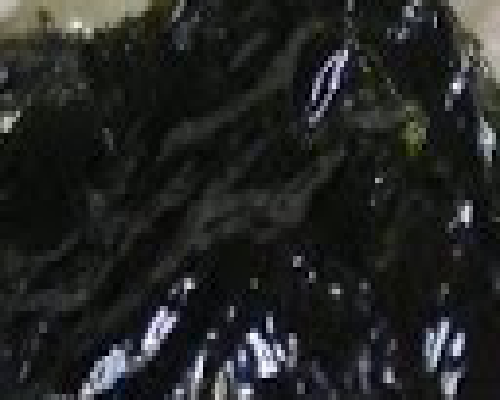

0.08214285714285716


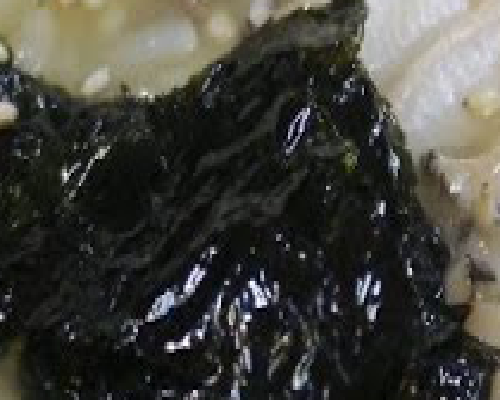

0.1142857142857143


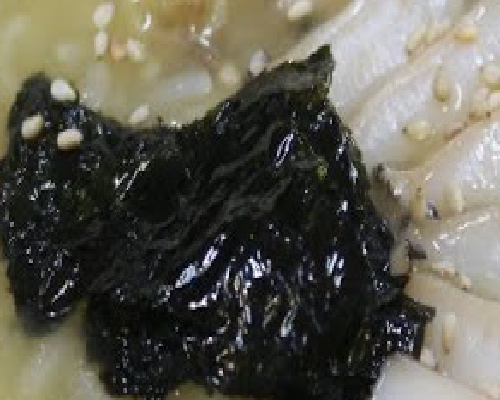

0.14642857142857146


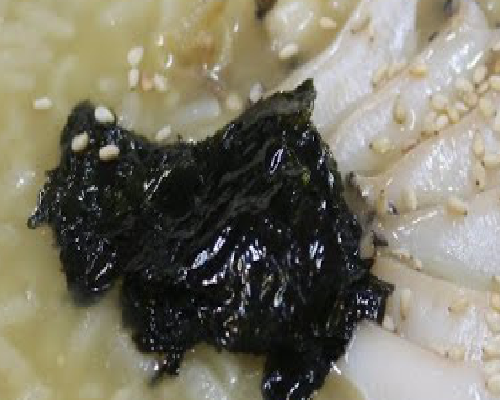

0.1785714285714286


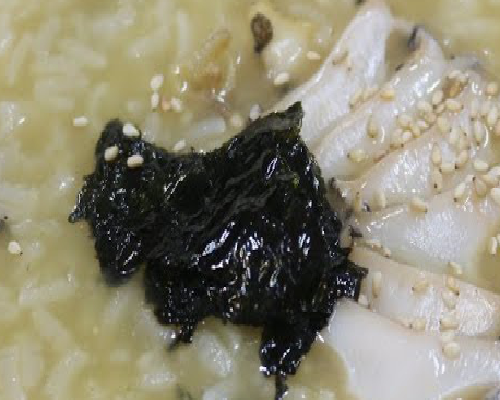

0.21071428571428574


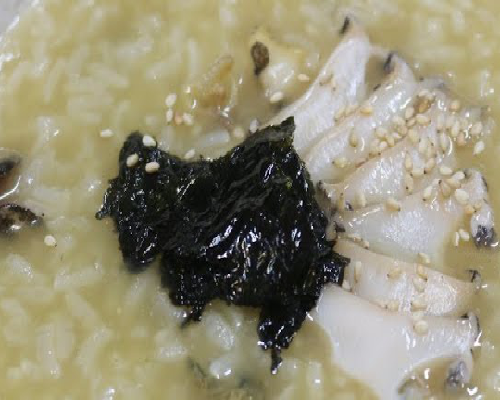

0.24285714285714288


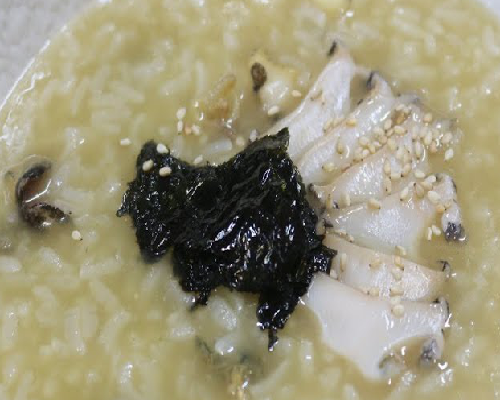

0.275


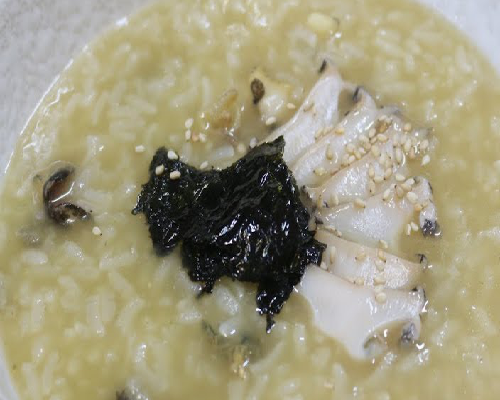

0.30714285714285716


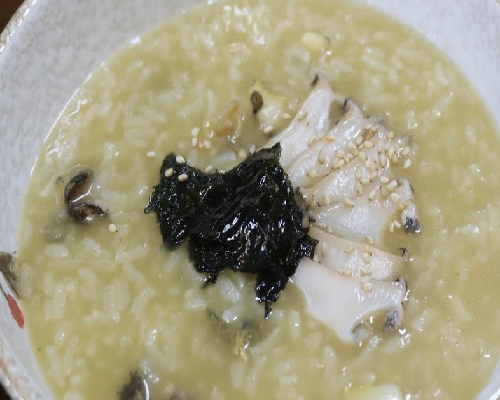

0.3392857142857143


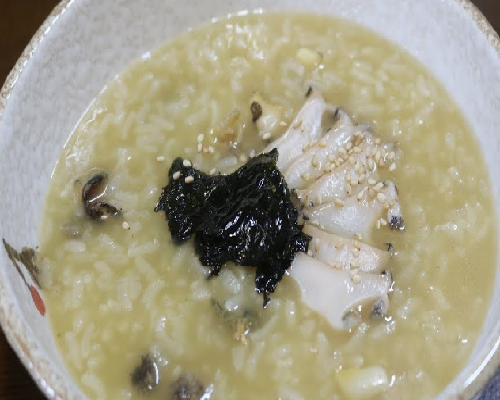

0.37142857142857144


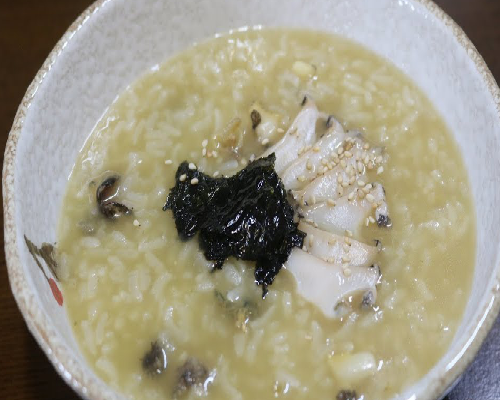

0.4035714285714286


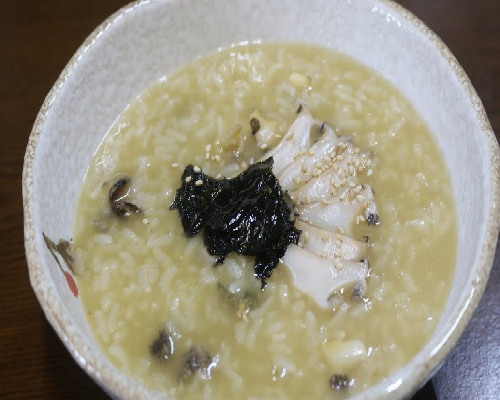

0.4357142857142858


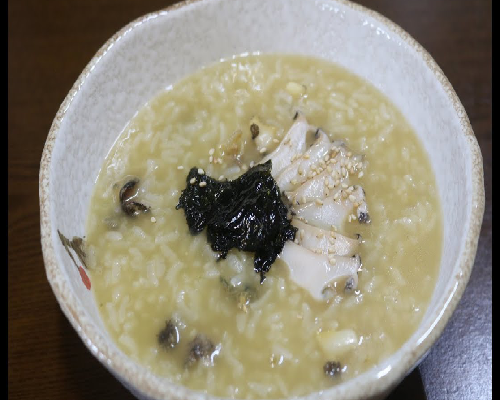

0.4678571428571429


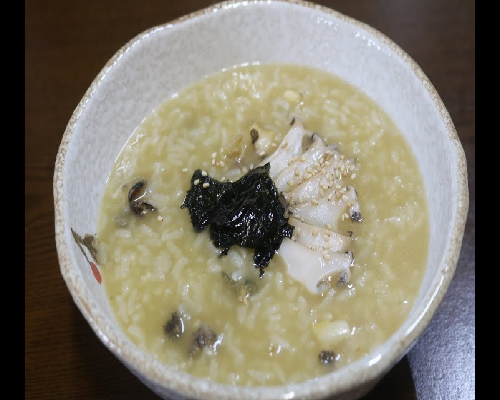

0.5


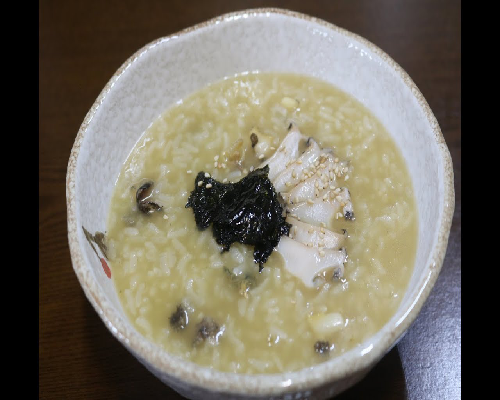

In [118]:
for i in numpy.linspace(0.05,0.5,15):
    
    left = center[0] - size[0] * i
    top = center[1] - size[1] * i
    right = center[0] + size[0] * i
    bottom = center[1] + size[1] * i
    area = (left, top, right, bottom)
    pil_element_img = img1.crop(area) 
    print(i)
    display(pil_element_img.resize((500,400)))